# SparseEdges tests: testing different parameters


For a full tutorial on Matching Pursuit, see http://blog.invibe.net/posts/2015-05-22-a-hitchhiker-guide-to-matching-pursuit.html.



In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

In [2]:
%cd -q ../probe

## Testing sf_0


In [3]:
%%writefile experiment_test_sf_0.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

Testing some parameters of the SparseEdges framework on its efficiency.

rm -fr data_cache/edges/testing_* data_cache/testing_* 
rm -fr results/edges/testing_* results/testing_*
frioul_batch  -n "14,15,16"  -M 36 'python experiment_test_parameters.py'
frioul_batch -M 200 'python experiment_test_parameters.py'

"""
__author__ = "(c) Laurent Perrinet INT - CNRS"
import numpy as np
import matplotlib
matplotlib.use("Agg") # agg-backend, so we can create figures without x-server (no PDF, just PNG etc.)

from SparseEdges import SparseEdges

# TODO: here, we are more interested in the processing of the database, not the comparison - use the correct function
# TODO : annotate the efficiency of different LogGabor bases (RMSE?)
# TODO: make a circular mask to avoid border effects coming with whitening...

#! comparing databases
#!--------------------
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.N = 128
mp.pe.datapath = '../../SLIP/database/'
mp.process('testing_vanilla')
# TODO: CRF
mp.process('testing_noise', noise=mp.pe.noise)
mp.process('testing_vanilla', name_database='serre07_targets')

# TODO : make an experiment showing that using scale does not bring much
mps, experiments = [], []
white_f0s = np.linspace(0.3, .6, 9)
for white_f0 in white_f0s:
    mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
    mp.N = 128
    mp.pe.datapath = '../../SLIP/database/'
    mp.pe.white_f0 = white_f0
    mp.init()
    exp = 'testing_white_f0_' + str(white_f0).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)
    
import matplotlib.pyplot as plt
fig_width_pt = 900 #318.670*.61 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

threshold = None
threshold = .25
databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % white_f0 for white_f0 in white_f0s]
fig = plt.figure(figsize=(fig_width, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps,
                  experiments=experiments, databases=databases, labels=labels, 
                  fig=fig, color=[0., 1., 0.], threshold=threshold, scale=True)    
a.set_xlabel(r' $Mf_{0}$')

import os
mp.savefig(fig, os.path.join(mp.pe.figpath, 'testing_white_f0'), display=True)
        
## TODO:  would be interesting to see how that changes with number of image patches used, i.e. whether it settles down to that particular pattern or just jumps around.


Overwriting experiment_test_sf_0.py


/Users/laurentperrinet/quantic/science/BICV/SparseEdges/probe/experiment_test_sf_0.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/l

not finished in  testing_white_f0_0_6 serre07_distractors


TypeError: 'NoneType' object is not iterable

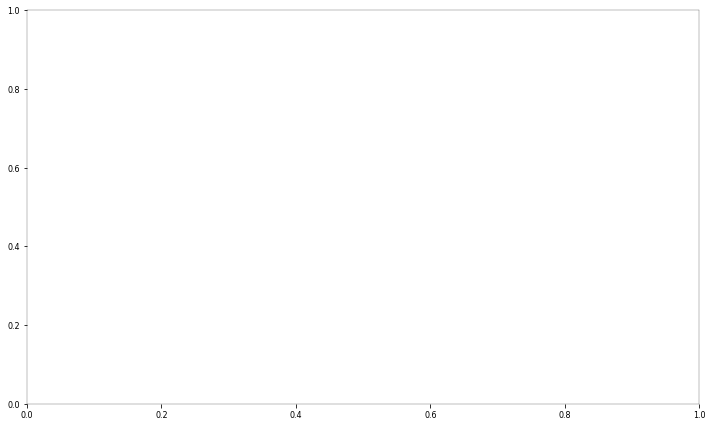

In [4]:
%run experiment_test_sf_0.py
fig

In [5]:
isinstance('toto', str)

True

## some book keeping for the notebook

In [6]:
%load_ext watermark
%watermark

2017-11-14T11:44:55+01:00

CPython 3.6.3
IPython 6.2.1

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)
system     : Darwin
release    : 17.0.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [7]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

Software versions
Python 3.6.3 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]
IPython 6.2.1
OS Darwin 17.0.0 x86_64 i386 64bit
numpy 1.13.3
scipy 1.0.0
matplotlib 2.1.0
sympy 1.1.1
Tue Nov 14 11:44:57 2017 CET

In [8]:
%cd -q ../notebooks